In [1]:
from pathlib import Path

from alr_sim.core import Scene

from alr_sim_tools.ycb_utils import YCBLoader
from alr_sim_tools.scene_utils import record_camera_data, reset_scene
from alr_sim_tools.visualization_utils import plot_pointcloud
from alr_sim_tools.data_utils import get_segmented_pointcloud

pybullet build time: May  2 2023 05:55:04


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
FACTORY_STRING = "mj_beta"
OBJECT_POS = (0.5, 0.0, 0.2)
CAM_POS = (0.5, 0.0, 1)
CAM_QUAT = [0.7071067811865476, 0.0, 0.0, -0.7071067811865475]
CAM_HEIGHT = 480
CAM_WIDTH = 640
INITIAL_ROBOT_POS = (0.0, 0.5, 0.2)
INITIAL_ROBOT_QUAT = (0, 1, 0, 0)
RENDER_MODE = Scene.RenderMode.HUMAN    

YCB_FOLDER = Path.home() / "Documents" / "SF-ObjectDataset" / "YCB"
YCB_OBJECT_ID = "011_banana"

DATATYPE = "pointcloud_segmented_points"
DATA_TARGET_FOLDER = Path.cwd().parent / "data" / DATATYPE / YCB_OBJECT_ID

In [3]:
ycb_loader = YCBLoader(ycb_base_folder=YCB_FOLDER, factory_string="mj_beta")

sim_obj = ycb_loader.get_ycb_object(
    pos=OBJECT_POS, quat=(0, 1, 0, 0), obj_id=YCB_OBJECT_ID, name=YCB_OBJECT_ID, grounded=True
)

In [4]:
camera_data, scene, agent = record_camera_data(
    factory_string=FACTORY_STRING,
    camera_position=CAM_POS,
    camera_quaternion=CAM_QUAT,
    camera_height=CAM_HEIGHT,
    camera_width=CAM_WIDTH,
    robot_position=INITIAL_ROBOT_POS,
    robot_quaternion=INITIAL_ROBOT_QUAT,
    object_list=[sim_obj],
    target_object_name=YCB_OBJECT_ID,
    render_mode=RENDER_MODE,
    wait_time=1,
)

reset_scene(FACTORY_STRING, scene, agent)

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>)

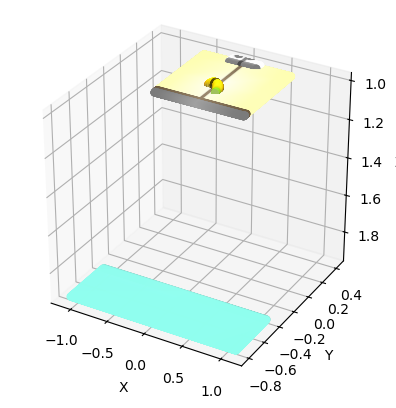

In [5]:
plot_pointcloud(camera_data.pointcloud_points, camera_data.pointcloud_colors, method="matplotlib")

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>)

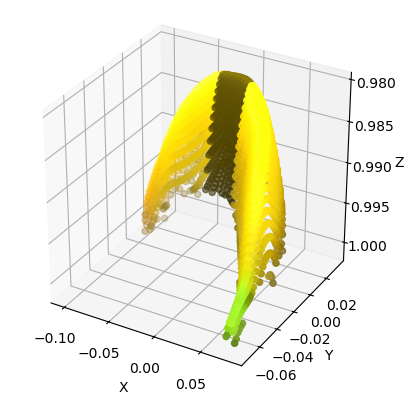

In [6]:
plot_pointcloud(
    camera_data.pointcloud_segmented_points,
    camera_data.pointcloud_segmented_colors,
    method="matplotlib",
)

In [7]:
# import open3d as o3d
# import numpy as np
# from alr_sim_tools.data_utils import quaternion_position_to_homogeneous_matrix

# pointcloud = o3d.geometry.PointCloud.create_from_depth_image(
#     o3d.geometry.Image(camera_data.depth_image),
#     o3d.camera.PinholeCameraIntrinsic(
#         camera_data.rgb_image.shape[1],
#         camera_data.rgb_image.shape[0],
#         camera_data.camera_intrinsics,
#     ),
#     extrinsic=quaternion_position_to_homogeneous_matrix(
#         camera_data.camera_position, camera_data.camera_quaternion
#     ),
#     depth_scale=1.0,
# )

# # rgb_image = o3d.geometry.Image(rgb_image.astype(np.uint8))
# # depth_image = o3d.geometry.Image(depth_image.astype(np.float32))

# # rgbd = o3d.geometry.RGBDImage.create_from_color_and_depth(
# #     rgb_image, depth_image, convert_rgb_to_intensity=False
# # )

# # intrinsics = o3d.camera.PinholeCameraIntrinsic(height, width, camera_intrinsics)
# # pointcloud = o3d.geometry.PointCloud.create_from_rgbd_image(
# #     image=rgbd,
# #     # extrinsic=quaternion_position_to_homogeneous_matrix(
# #     #     camera_position, camera_quaternion
# #     # ),
# #     intrinsic=intrinsics,
# #     project_valid_depth_only=True,
# # )

# pointcloud_points, pointcloud_colors = np.asarray(pointcloud.points), np.asarray(
#     pointcloud.colors
# )

# pointcloud_points
# plot_pointcloud(pointcloud_points, method="matplotlib")

In [8]:
segemented_pointcloud_points, segmented_pointcloud_colors = get_segmented_pointcloud(
    camera_data.depth_image,
    camera_data.segmentation_image,
    camera_data.rgb_image,
    camera_data.camera_position,
    camera_data.camera_quaternion,
    camera_data.camera_intrinsics,
)

plot_pointcloud(
    segemented_pointcloud_points,
    segmented_pointcloud_colors,
    method="matplotlib",
)

TypeError: create_from_rgbd_image(): incompatible function arguments. The following argument types are supported:
    1. (image: open3d::geometry::RGBDImage, intrinsic: open3d.cuda.pybind.camera.PinholeCameraIntrinsic, extrinsic: numpy.ndarray[numpy.float64[4, 4]] = array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]]), project_valid_depth_only: bool = True) -> open3d.cuda.pybind.geometry.PointCloud

Invoked with: kwargs: image=RGBDImage of size 
Color image : 640x480, with 3 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data., extrinsic=array([[ 2.22044605e-16, -1.00000000e+00,  0.00000000e+00,
         5.00000000e-01],
       [-1.00000000e+00, -2.22044605e-16,  0.00000000e+00,
         0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00, -1.00000000e+00,
         1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), intrinsic=PinholeCameraIntrinsic with width = 480 and height = 640.
Access intrinsics with intrinsic_matrix., project_valid_depth_only=True, depth_scale=1.0